In [1]:
from LMSR_LS import LS_LMSR_swap, LS_LMSR_prediction
from token_class import Token
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Uticaj alpha na trzista predvidjanja

In [3]:
alpha = [0.001, 0.01, 0.1, 1, 10]
for a_i in alpha:
    pred = LS_LMSR_prediction([Token('a', 1000), Token('b', 1000)], a_i)
    c0 = round(pred.cost_function(), 4)
    print('p1_0 = ', round(pred.price_function(pred.getTokens()[0]), 4))
    print('p2_0 = ', round(pred.price_function(pred.getTokens()[1]), 4))
    pred.trade('a', 10)
    c10 = round(pred.cost_function(),4)
    print('p1_1 = ', round(pred.price_function(pred.getTokens()[0]), 4))
    print('p2_1 = ', round(pred.price_function(pred.getTokens()[1]), 4))
    print('alpha = ',a_i ,'\tc(q_0) = ', c0, '\tc(q_1) = ', c10, '\tc(q_1) - c(q_0) = ',round(c10 - c0,4))
    print()

p1_0 =  0.5007
p2_0 =  0.5007
p1_1 =  0.9932
p2_1 =  0.0069
alpha =  0.001 	c(q_0) =  1001.3863 	c(q_1) =  1010.0138 	c(q_1) - c(q_0) =  8.6275

p1_0 =  0.5069
p2_0 =  0.5069
p1_1 =  0.6285
p2_1 =  0.3848
alpha =  0.01 	c(q_0) =  1013.8629 	c(q_1) =  1019.5478 	c(q_1) - c(q_0) =  5.6849

p1_0 =  0.5693
p2_0 =  0.5693
p1_1 =  0.5817
p2_1 =  0.5568
alpha =  0.1 	c(q_0) =  1138.6294 	c(q_1) =  1144.3848 	c(q_1) - c(q_0) =  5.7554

p1_0 =  1.1931
p2_0 =  1.1931
p1_1 =  1.1944
p2_1 =  1.1919
alpha =  1 	c(q_0) =  2386.2944 	c(q_1) =  2398.2321 	c(q_1) - c(q_0) =  11.9377

p1_0 =  7.4315
p2_0 =  7.4315
p1_1 =  7.4316
p2_1 =  7.4313
alpha =  10 	c(q_0) =  14862.9436 	c(q_1) =  14937.259 	c(q_1) - c(q_0) =  74.3154



In [4]:
#Uticaj alpha na trzista za razmenu tokena

<Figure size 1080x720 with 0 Axes>

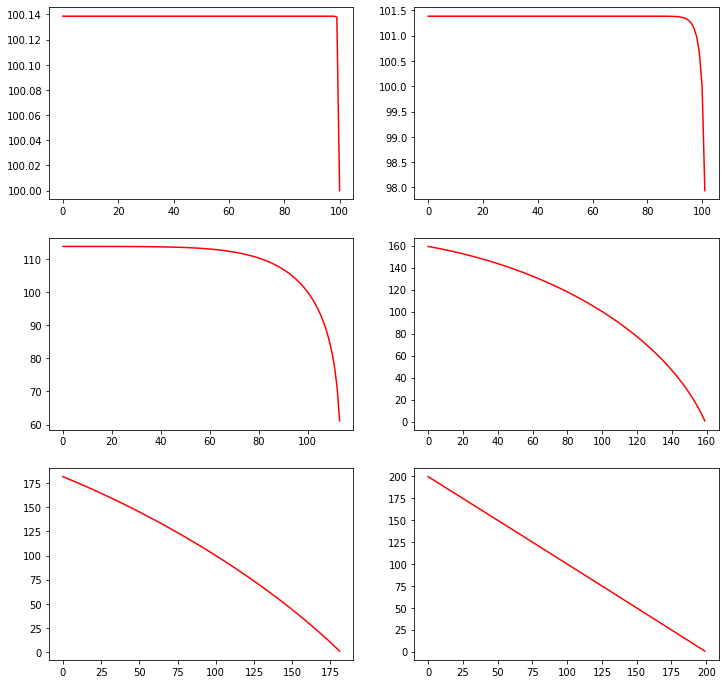

In [5]:
alpha = [0.001, 0.01, 0.1, 1, 10]

color = ['red', 'blue', 'green', 'gray', 'orange', 'pink', 'black']
#swap001 = LMSR_swap([Token('a', 100), Token('b', 100)],0.01)
swap0001 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],0.001)
swap001 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],0.01)
swap01 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],0.1)
swap05 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],0.5)
swap1 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],1)
swap10 = LS_LMSR_swap([Token('a', 100), Token('b', 100)],10)
x = [i for i in range(0, 101)]
fig = plt.figure(figsize=(15,10))
# gs  = gridspec.GridSpec(4, 1, height_ratios=[1, 1 ,1.5, 1])
# ax0 = plt.subplot(gs[0])
# ax1 = plt.subplot(gs[1])
# ax2 = plt.subplot(gs[2])
# ax3 = plt.subplot(gs[3])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
#x = [i in range(0, swap01.cost_function(), 1)]
x = np.arange(0, swap0001.unknownAmount(0), 1)
axes[0][0].plot(x, [swap0001.unknownAmount(j) for j in x], color = 'red', label = 'a')

x = np.arange(0, swap001.unknownAmount(0), 1)
axes[0][1].plot(x, [swap001.unknownAmount(j) for j in x], color = 'red', label = 'b')

x = np.arange(0, swap01.unknownAmount(0), 1)
axes[1][0].plot(x, [swap01.unknownAmount(j) for j in x], color = 'red', label = 'c')

x = np.arange(0, swap05.unknownAmount(0), 1)
axes[1][1].plot(x, [swap05.unknownAmount(j) for j in x], color = 'red', label = 'd')

x = np.arange(0, swap1.unknownAmount(0), 1)
axes[2][0].plot(x, [swap1.unknownAmount(j) for j in x], color = 'red', label = 'e')

x = np.arange(0, swap10.unknownAmount(0), 1)
axes[2][1].plot(x, [swap10.unknownAmount(j) for j in x], color = 'red', label = 'e')

plt.savefig('LS_LMSR_swap_alpha.jpeg')
plt.show()

In [6]:
#Nezavisnost putanje

In [7]:
#Kupovina 10 odjednom na trzistu predvidjanja
prediction_path_idepedent10 = LS_LMSR_prediction([Token('a', 1000), Token('b', 1000)], 0.5)

In [8]:
round(prediction_path_idepedent10.cost_function(), 4)

1693.1472

In [9]:
round(prediction_path_idepedent10.trade('a', 10), 4)

8.4782

In [10]:
prediction_path_idepedent10.poolState()

Token:
	name:  a 	amount:  1010
Token:
	name:  b 	amount:  1000


In [11]:
#Kupovina jedan po jedan na tristu predvidjanja
prediction_path_idepedent1 = LS_LMSR_prediction([Token('a', 1000), Token('b', 1000)], 0.5)
s = 0
for i in range(10):
    pay = round(prediction_path_idepedent1.trade('a', 1), 5)
    print('c = ', round(prediction_path_idepedent1.cost_function(), 4))
    print('Korisnik placa: ', pay)
    prediction_path_idepedent1.poolState()
    print()
    s += pay
print()
print('Ukupni troskovi', round(s, 4))

c =  1693.9939
Korisnik placa:  0.8467
Token:
	name:  a 	amount:  1001
Token:
	name:  b 	amount:  1000

c =  1694.8408
Korisnik placa:  0.84695
Token:
	name:  a 	amount:  1002
Token:
	name:  b 	amount:  1000

c =  1695.688
Korisnik placa:  0.8472
Token:
	name:  a 	amount:  1003
Token:
	name:  b 	amount:  1000

c =  1696.5355
Korisnik placa:  0.84745
Token:
	name:  a 	amount:  1004
Token:
	name:  b 	amount:  1000

c =  1697.3832
Korisnik placa:  0.84769
Token:
	name:  a 	amount:  1005
Token:
	name:  b 	amount:  1000

c =  1698.2311
Korisnik placa:  0.84794
Token:
	name:  a 	amount:  1006
Token:
	name:  b 	amount:  1000

c =  1699.0793
Korisnik placa:  0.84819
Token:
	name:  a 	amount:  1007
Token:
	name:  b 	amount:  1000

c =  1699.9277
Korisnik placa:  0.84844
Token:
	name:  a 	amount:  1008
Token:
	name:  b 	amount:  1000

c =  1700.7764
Korisnik placa:  0.84869
Token:
	name:  a 	amount:  1009
Token:
	name:  b 	amount:  1000

c =  1701.6254
Korisnik placa:  0.84893
Token:
	name:  a 	

In [12]:
#Kupovina 10 na trzistu za razmenu
swap_path_idepedent10 = LS_LMSR_swap([Token('a', 1000), Token('b', 1000)], 0.5)

In [13]:
round(swap_path_idepedent10.cost_function(), 4)

1693.1472

In [14]:
round(swap_path_idepedent10.swap('buy', 'a', 10), 4)

9.9413

In [15]:
swap_path_idepedent10.poolState()

Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1009.94128392


In [16]:
#Kupovina jedan po jedan
swap_path_idepedent1 = LS_LMSR_swap([Token('a', 1000), Token('b', 1000)], 0.5)
s = 0
for i in range(10):
    pay = round(swap_path_idepedent1.swap('buy', 'a', 1), 4)
    print()
    print('Korisnik placa: ', round(pay, 4))
    swap_path_idepedent1.poolState()
    s += pay
print()
print('Ukupni troskovi', round(s, 4))


Korisnik placa:  0.9994
Token:
	name:  a 	amount:  999
Token:
	name:  b 	amount:  1000.99940973

Korisnik placa:  0.9982
Token:
	name:  a 	amount:  998
Token:
	name:  b 	amount:  1001.99764032

Korisnik placa:  0.9971
Token:
	name:  a 	amount:  997
Token:
	name:  b 	amount:  1002.99469385

Korisnik placa:  0.9959
Token:
	name:  a 	amount:  996
Token:
	name:  b 	amount:  1003.99057238

Korisnik placa:  0.9947
Token:
	name:  a 	amount:  995
Token:
	name:  b 	amount:  1004.98527799

Korisnik placa:  0.9935
Token:
	name:  a 	amount:  994
Token:
	name:  b 	amount:  1005.97881274

Korisnik placa:  0.9924
Token:
	name:  a 	amount:  993
Token:
	name:  b 	amount:  1006.97117866

Korisnik placa:  0.9912
Token:
	name:  a 	amount:  992
Token:
	name:  b 	amount:  1007.96237781

Korisnik placa:  0.99
Token:
	name:  a 	amount:  991
Token:
	name:  b 	amount:  1008.95241222

Korisnik placa:  0.9889
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1009.94128392

Ukupni troskovi 9.9413


In [17]:
#Osetljivost na likvidnost

In [18]:
init = [50, 100, 500, 1000, 5000, 10000]


In [19]:
#Trzista predvidjanja
for i in init:
    prediction_liquidity = LS_LMSR_prediction([Token('a', i), Token('b', i)], 0.5)
    print(i)
    print('c0 = ' ,round(prediction_liquidity.cost_function(), 4))
    print('p1_0 = ', round(prediction_liquidity.price_function(prediction_liquidity.getTokens()[0]), 4))
    print('p2_0 = ', round(prediction_liquidity.price_function(prediction_liquidity.getTokens()[1]), 4))
    pay = prediction_liquidity.trade('a', 10)
    print('c1 = ' ,round(prediction_liquidity.cost_function(), 4))
    print('pay = ', round(pay, 4))
    print('p1_1 = ', round(prediction_liquidity.price_function(prediction_liquidity.getTokens()[0]), 4))
    print('p2_1 = ', round(prediction_liquidity.price_function(prediction_liquidity.getTokens()[1]), 4))
    
    print()

50
c0 =  84.6574
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  93.3501
pay =  8.6927
p1_1 =  0.8898
p2_1 =  0.7992

100
c0 =  169.3147
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  177.8995
pay =  8.5847
p1_1 =  0.8698
p2_1 =  0.8222

500
c0 =  846.5736
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  855.0641
pay =  8.4905
p1_1 =  0.8515
p2_1 =  0.8416

1000
c0 =  1693.1472
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  1701.6254
pay =  8.4782
p1_1 =  0.8491
p2_1 =  0.8441

5000
c0 =  8465.7359
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  8474.2041
pay =  8.4682
p1_1 =  0.8471
p2_1 =  0.8461

10000
c0 =  16931.4718
p1_0 =  0.8466
p2_0 =  0.8466
c1 =  16939.9388
pay =  8.467
p1_1 =  0.8468
p2_1 =  0.8463



In [20]:
#Trzista za razmenu
for i in init:
    swap_liquidity = LS_LMSR_swap([Token('a', i), Token('b', i)], 0.5)
    print(i)
    print('c0 = ' ,round(swap_liquidity.cost_function(), 4))
    print('p1_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    pay = swap_liquidity.swap('buy','a', 10)
    print('pay = ', round(pay, 4))
    print('p1_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    
    swap_liquidity.poolState()
    print()

50
c0 =  84.6574
p1_0 =  0.8466
p2_0 =  0.8466
pay =  8.9362
p1_1 =  0.743
p2_1 =  0.9321
Token:
	name:  a 	amount:  40
Token:
	name:  b 	amount:  58.93617377

100
c0 =  169.3147
p1_0 =  0.8466
p2_0 =  0.8466
pay =  9.4412
p1_1 =  0.7956
p2_1 =  0.8928
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  109.44124445

500
c0 =  846.5736
p1_0 =  0.8466
p2_0 =  0.8466
pay =  9.8832
p1_1 =  0.8365
p2_1 =  0.8564
Token:
	name:  a 	amount:  490
Token:
	name:  b 	amount:  509.88324595

1000
c0 =  1693.1472
p1_0 =  0.8466
p2_0 =  0.8466
pay =  9.9413
p1_1 =  0.8416
p2_1 =  0.8515
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1009.94128392

5000
c0 =  8465.7359
p1_0 =  0.8466
p2_0 =  0.8466
pay =  9.9882
p1_1 =  0.8456
p2_1 =  0.8476
Token:
	name:  a 	amount:  4990
Token:
	name:  b 	amount:  5009.9882016

10000
c0 =  16931.4718
p1_0 =  0.8466
p2_0 =  0.8466
pay =  9.9941
p1_1 =  0.8461
p2_1 =  0.8471
Token:
	name:  a 	amount:  9990
Token:
	name:  b 	amount:  10009.99409732



In [21]:
#Nestalni gubitak i dobit

In [22]:
swap05 = LS_LMSR_swap([Token('a', 10), Token('b',  100)],0.5)
x = np.arange(2, swap05.unknownAmount(0), 1)
y = [swap05.unknownAmount(j) for j in x]

In [23]:
swap05.cost_function()

109.78361902380469

In [24]:
swap05.impermanentLostAndGain(swap05.getTokens()[1])

0.0

In [25]:
swap05.swap('buy', 'a', 8)

2.6489958022225437

In [26]:
swap05.poolState()

Token:
	name:  a 	amount:  2
Token:
	name:  b 	amount:  102.6489958


In [27]:
imp_loss = [swap05.impermanentLostAndGain(swap05.getTokens()[1])]

In [28]:
for i in range(1, len(x)):
  swap05.swap('sell', 'a', 1)
  imp_loss.append(swap05.impermanentLostAndGain(swap05.getTokens()[1]))

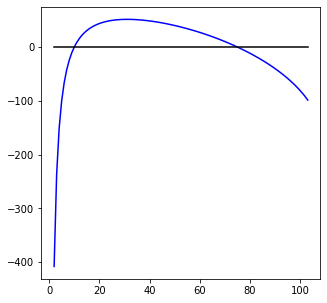

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(x, imp_loss, color = 'blue')
plt.plot(x, [0 for i in range (0, len(x))], color = 'black')
plt.savefig('impermanentLossLS_LMSR.jpeg')
plt.figure().clear()